<a href="https://colab.research.google.com/github/jcjimenezb123/PFM_PronosticoDemanda/blob/master/RecVta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reconstrucción de la venta

In [1]:
import pandas as pd
import numpy as np

##Crear el DataFrame con ventas aleatorias

In [2]:
#un año, 4,000 modelos, 10 tallas
365*4000*10
#18,250,000 por tienda

14600000

In [3]:
#se crean las ventas en un rango de [0,99] para 17 tiendas
df=pd.DataFrame(np.random.randint(0,100,(14600000,17)),columns=list('abcdefghijklmnopq'))
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14600000 entries, 0 to 14599999
Data columns (total 17 columns):
 #   Column  Dtype
---  ------  -----
 0   a       int64
 1   b       int64
 2   c       int64
 3   d       int64
 4   e       int64
 5   f       int64
 6   g       int64
 7   h       int64
 8   i       int64
 9   j       int64
 10  k       int64
 11  l       int64
 12  m       int64
 13  n       int64
 14  o       int64
 15  p       int64
 16  q       int64
dtypes: int64(17)
memory usage: 1.8 GB


In [4]:
df.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q
0,67,12,65,29,76,40,31,15,65,77,43,44,82,87,49,80,77
1,3,17,69,65,52,9,51,80,37,62,40,74,6,92,39,36,18
2,34,3,81,5,9,93,60,67,4,37,95,89,21,26,82,19,5
3,70,83,44,64,80,29,59,42,93,76,61,60,8,63,39,93,51
4,35,85,34,41,41,83,11,47,26,6,46,10,81,5,23,11,90


In [5]:
#Se agregan las columnas de id_art, talla y fecha
df['id_art']=0
df['talla']=0
df['fecha']=pd.Timestamp('2020-01-01')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14600000 entries, 0 to 14599999
Data columns (total 20 columns):
 #   Column  Dtype         
---  ------  -----         
 0   a       int64         
 1   b       int64         
 2   c       int64         
 3   d       int64         
 4   e       int64         
 5   f       int64         
 6   g       int64         
 7   h       int64         
 8   i       int64         
 9   j       int64         
 10  k       int64         
 11  l       int64         
 12  m       int64         
 13  n       int64         
 14  o       int64         
 15  p       int64         
 16  q       int64         
 17  id_art  int64         
 18  talla   int64         
 19  fecha   datetime64[ns]
dtypes: datetime64[ns](1), int64(19)
memory usage: 2.2 GB


In [6]:
#Se asignan los valores de los id_art, talla y fecha
r=0
for id in range(10000,14000):
  df['id_art'][r:r+3650] = id
  for t in range(22,32):
    df['talla'][r:r+365] = t
    df['fecha'][r:r+365] = pd.date_range(start='1/1/2020', periods=365, freq='D')
    r+=365

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [7]:
#se obtiene el dia de la semana
df['dia_semana'] = df['fecha'].dt.day_name()
#df['semana']=df['fecha'].dt.week
df['desde']=df['fecha'].dt.to_period('W').dt.start_time
df

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,id_art,talla,fecha,dia_semana,desde
0,67,12,65,29,76,40,31,15,65,77,43,44,82,87,49,80,77,10000,22,2020-01-01,Wednesday,2019-12-30
1,3,17,69,65,52,9,51,80,37,62,40,74,6,92,39,36,18,10000,22,2020-01-02,Thursday,2019-12-30
2,34,3,81,5,9,93,60,67,4,37,95,89,21,26,82,19,5,10000,22,2020-01-03,Friday,2019-12-30
3,70,83,44,64,80,29,59,42,93,76,61,60,8,63,39,93,51,10000,22,2020-01-04,Saturday,2019-12-30
4,35,85,34,41,41,83,11,47,26,6,46,10,81,5,23,11,90,10000,22,2020-01-05,Sunday,2019-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14599995,97,80,89,95,79,65,69,68,51,51,98,20,53,50,89,42,87,13999,31,2020-12-26,Saturday,2020-12-21
14599996,45,59,95,59,82,46,4,53,58,55,91,52,13,72,82,57,15,13999,31,2020-12-27,Sunday,2020-12-21
14599997,43,72,35,34,49,51,20,13,34,56,38,5,38,57,38,46,12,13999,31,2020-12-28,Monday,2020-12-28
14599998,34,68,99,76,22,58,60,75,51,89,70,78,91,75,19,4,89,13999,31,2020-12-29,Tuesday,2020-12-28


##Se analiza un modelo-talla

In [8]:
#se obtiene una mustra de un modelo talla
idtalla=df[(df['id_art']==10000) & (df['talla']==22)]
idtalla.sort_values(by=['fecha'],inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
import plotly.express as px

fig = px.line(idtalla, x="fecha", y="a")
fig.show()

In [10]:
fig = px.scatter(idtalla, x="fecha", y="a",marginal_y='histogram')
fig.show()

In [11]:
df.sort_values(by=['id_art','talla','dia_semana','fecha'],inplace=True)
df

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,id_art,talla,fecha,dia_semana,desde
2,34,3,81,5,9,93,60,67,4,37,95,89,21,26,82,19,5,10000,22,2020-01-03,Friday,2019-12-30
9,94,35,25,86,93,17,51,25,92,86,21,81,38,40,67,71,47,10000,22,2020-01-10,Friday,2020-01-06
16,70,50,88,21,68,61,32,14,55,3,27,24,80,82,8,5,57,10000,22,2020-01-17,Friday,2020-01-13
23,0,69,75,68,2,0,12,34,48,46,23,30,8,36,26,76,46,10000,22,2020-01-24,Friday,2020-01-20
30,85,39,88,41,78,34,33,20,60,63,90,94,60,81,86,73,79,10000,22,2020-01-31,Friday,2020-01-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14599971,8,38,5,72,82,43,58,85,94,2,31,50,76,15,45,0,34,13999,31,2020-12-02,Wednesday,2020-11-30
14599978,10,69,14,52,0,89,8,5,5,83,75,18,6,50,23,8,57,13999,31,2020-12-09,Wednesday,2020-12-07
14599985,5,14,36,47,51,80,54,54,61,18,98,8,79,5,87,59,72,13999,31,2020-12-16,Wednesday,2020-12-14
14599992,37,62,94,9,2,0,84,41,98,9,97,81,92,30,89,26,22,13999,31,2020-12-23,Wednesday,2020-12-21


##Se crean valores nulos aleatorios simulando los días negados

In [12]:
#se genera el 10% de negados por tienda
for c in range(17):
  inulos=np.random.randint(0,14600000,1460000)
  df.iloc[inulos,c]=np.nan

In [13]:
#se cuenta el total de negados generados
df.isna().sum().sum()

23619584

In [22]:
#Se observan los negados generados
df.head(30).style.applymap(lambda x: None if x==x else 'color: red')

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,id_art,talla,fecha,dia_semana,desde
2,nan,69.000000,22.000000,50.000000,86.000000,80.000000,37.000000,58.000000,81.000000,nan,27.000000,50.000000,43.000000,nan,68.000000,97.000000,87.000000,10000,22,2020-01-03 00:00:00,Friday,2019-12-30 00:00:00
9,22.000000,9.000000,64.000000,90.000000,18.000000,nan,74.000000,14.000000,18.000000,nan,59.000000,26.000000,74.000000,79.000000,60.000000,2.000000,92.000000,10000,22,2020-01-10 00:00:00,Friday,2020-01-06 00:00:00
16,94.000000,15.000000,82.000000,36.000000,12.000000,69.000000,74.000000,nan,20.000000,89.000000,39.000000,62.000000,30.000000,11.000000,62.000000,84.000000,77.000000,10000,22,2020-01-17 00:00:00,Friday,2020-01-13 00:00:00
23,35.000000,59.000000,33.000000,98.000000,nan,81.000000,nan,62.000000,79.000000,3.000000,47.000000,45.000000,64.000000,82.000000,23.000000,9.000000,90.000000,10000,22,2020-01-24 00:00:00,Friday,2020-01-20 00:00:00
30,98.000000,29.000000,97.000000,38.000000,77.000000,91.000000,94.000000,28.000000,56.000000,91.000000,99.000000,53.000000,36.000000,35.000000,4.000000,26.000000,16.000000,10000,22,2020-01-31 00:00:00,Friday,2020-01-27 00:00:00
37,6.000000,72.000000,12.000000,47.000000,nan,14.000000,7.000000,31.000000,58.000000,21.000000,20.000000,54.000000,nan,57.000000,23.000000,53.000000,48.000000,10000,22,2020-02-07 00:00:00,Friday,2020-02-03 00:00:00
44,7.000000,nan,55.000000,50.000000,nan,33.000000,77.000000,88.000000,9.000000,13.000000,89.000000,95.000000,6.000000,10.000000,7.000000,60.000000,40.000000,10000,22,2020-02-14 00:00:00,Friday,2020-02-10 00:00:00
51,nan,90.000000,20.000000,88.000000,29.000000,82.000000,41.000000,33.000000,33.000000,nan,96.000000,64.000000,nan,28.000000,46.000000,76.000000,nan,10000,22,2020-02-21 00:00:00,Friday,2020-02-17 00:00:00
58,92.000000,21.000000,94.000000,61.000000,91.000000,34.000000,91.000000,67.000000,6.000000,58.000000,nan,37.000000,nan,64.000000,92.000000,nan,71.000000,10000,22,2020-02-28 00:00:00,Friday,2020-02-24 00:00:00
65,19.000000,14.000000,2.000000,59.000000,85.000000,68.000000,27.000000,2.000000,94.000000,26.000000,6.000000,76.000000,53.000000,71.000000,49.000000,24.000000,53.000000,10000,22,2020-03-06 00:00:00,Friday,2020-03-02 00:00:00


In [14]:
idtalla=df[(df['id_art']==10000) & (df['talla']==22)]
idtalla.sort_values(by=['fecha'],inplace=True)
fig = px.line(idtalla, x="fecha", y="a")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##Se reconstruye la venta usando el método de interpolación lineal

In [15]:
for t in 'abcdefghijklmnopq':
  df[t].interpolate(method='linear', limit_direction='forward',inplace=True)

##Se analiza el resultado

In [25]:
df.head(30)

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,id_art,talla,fecha,dia_semana,desde
2,NaN,69.0,22.000000,50.0,86.0,80.0,37.0,58.0,81.0,NaN,27.0,50.0,43.000000,NaN,68.0,97.0,87.0,10000,22,2020-01-03,Friday,2019-12-30
9,22.0,9.0,64.000000,90.0,18.0,74.5,74.0,14.0,18.0,NaN,59.0,26.0,74.000000,79.0,60.0,2.0,92.0,10000,22,2020-01-10,Friday,2020-01-06
16,94.0,15.0,82.000000,36.0,12.0,69.0,74.0,38.0,20.0,89.0,39.0,62.0,30.000000,11.0,62.0,84.0,77.0,10000,22,2020-01-17,Friday,2020-01-13
23,35.0,59.0,33.000000,98.0,44.5,81.0,84.0,62.0,79.0,3.0,47.0,45.0,64.000000,82.0,23.0,9.0,90.0,10000,22,2020-01-24,Friday,2020-01-20
30,98.0,29.0,97.000000,38.0,77.0,91.0,94.0,28.0,56.0,91.0,99.0,53.0,36.000000,35.0,4.0,26.0,16.0,10000,22,2020-01-31,Friday,2020-01-27
37,6.0,72.0,12.000000,47.0,61.0,14.0,7.0,31.0,58.0,21.0,20.0,54.0,21.000000,57.0,23.0,53.0,48.0,10000,22,2020-02-07,Friday,2020-02-03
44,7.0,81.0,55.000000,50.0,45.0,33.0,77.0,88.0,9.0,13.0,89.0,95.0,6.000000,10.0,7.0,60.0,40.0,10000,22,2020-02-14,Friday,2020-02-10
51,49.5,90.0,20.000000,88.0,29.0,82.0,41.0,33.0,33.0,35.5,96.0,64.0,21.666667,28.0,46.0,76.0,55.5,10000,22,2020-02-21,Friday,2020-02-17
58,92.0,21.0,94.000000,61.0,91.0,34.0,91.0,67.0,6.0,58.0,51.0,37.0,37.333333,64.0,92.0,50.0,71.0,10000,22,2020-02-28,Friday,2020-02-24
65,19.0,14.0,2.000000,59.0,85.0,68.0,27.0,2.0,94.0,26.0,6.0,76.0,53.000000,71.0,49.0,24.0,53.0,10000,22,2020-03-06,Friday,2020-03-02


In [16]:
idtalla=df[(df['id_art']==10000) & (df['talla']==22)]
idtalla.sort_values(by=['fecha'],inplace=True)
fig = px.line(idtalla, x="fecha", y="a")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##Venta por modelo-semana

In [17]:
df2=df[['desde','id_art','a']]
df2

,desde,id_art,a
2,2019-12-30,10000,34.0
9,2020-01-06,10000,94.0
16,2020-01-13,10000,70.0
23,2020-01-20,10000,0.0
30,2020-01-27,10000,85.0
...,...,...,...
14599971,2020-11-30,13999,8.0
14599978,2020-12-07,13999,10.0
14599985,2020-12-14,13999,5.0
14599992,2020-12-21,13999,37.0


In [18]:
df2=df2.groupby(['id_art','desde']).sum().reset_index()
df2

,id_art,desde,a
0,10000,2019-12-30,2208.000000
1,10000,2020-01-06,3797.333333
2,10000,2020-01-13,3525.000000
3,10000,2020-01-20,3482.666667
4,10000,2020-01-27,3275.000000
...,...,...,...
211995,13999,2020-11-30,3513.666667
211996,13999,2020-12-07,3717.833333
211997,13999,2020-12-14,3481.166667
211998,13999,2020-12-21,3756.000000


In [19]:
id=df2[df2['id_art']==10000]
id.sort_values(by=['desde'],inplace=True)

import plotly.express as px

fig = px.line(id, x="desde", y="a")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##Pronostico de la demanda

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [21]:
id=id.set_index('desde')
id

,id_art,a
desde,,
2019-12-30,10000,2208.000000
2020-01-06,10000,3797.333333
2020-01-13,10000,3525.000000
2020-01-20,10000,3482.666667
2020-01-27,10000,3275.000000
2020-02-03,10000,3134.500000
2020-02-10,10000,3369.000000
2020-02-17,10000,3917.500000
2020-02-24,10000,3678.166667


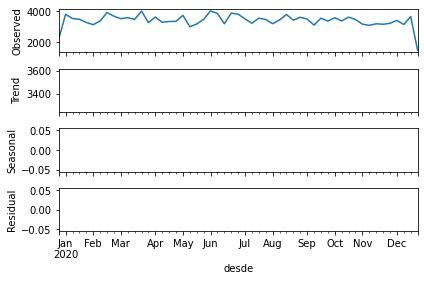

In [22]:
descomposicion = seasonal_decompose(id['a'],model='multiplicative')
descomposicion.plot();

###SMA - Simple Moving Averages

In [23]:
id['SMA_mes'] = id['a'].rolling(window=2).mean()
id['SMA_2mes'] = id['a'].rolling(window=3).mean()
id2=id[['a','SMA_mes','SMA_2mes']]
id2=id2.reset_index()
id2

,desde,a,SMA_mes,SMA_2mes
0,2019-12-30,2208.000000,NaN,NaN
1,2020-01-06,3797.333333,3002.666667,NaN
2,2020-01-13,3525.000000,3661.166667,3176.777778
3,2020-01-20,3482.666667,3503.833333,3601.666667
4,2020-01-27,3275.000000,3378.833333,3427.555556
5,2020-02-03,3134.500000,3204.750000,3297.388889
6,2020-02-10,3369.000000,3251.750000,3259.500000
7,2020-02-17,3917.500000,3643.250000,3473.666667
8,2020-02-24,3678.166667,3797.833333,3654.888889
9,2020-03-02,3518.833333,3598.500000,3704.833333


In [24]:
fig = px.line(id2, x='desde', y='a')
fig.add_scatter(x=id2['desde'], y=id2['SMA_mes'], mode='lines')
fig.add_scatter(x=id2['desde'], y=id2['SMA_2mes'], mode='lines')
fig.show()

###EWMA - Exponentially Weighted Moving Average

EWMA permite reducir el retraso al dar más peso a las lecturas o valores recientes. La cantidad de peso aplicado depende de los parámetros reales en el EWMA y el número de períodos dados en el tamaño de una ventana.

In [25]:
id2['ewma12'] = id2['a'].ewm(span=2,adjust=False).mean()
id2

,desde,a,SMA_mes,SMA_2mes,ewma12
0,2019-12-30,2208.000000,NaN,NaN,2208.000000
1,2020-01-06,3797.333333,3002.666667,NaN,3267.555556
2,2020-01-13,3525.000000,3661.166667,3176.777778,3439.185185
3,2020-01-20,3482.666667,3503.833333,3601.666667,3468.172840
4,2020-01-27,3275.000000,3378.833333,3427.555556,3339.390947
5,2020-02-03,3134.500000,3204.750000,3297.388889,3202.796982
6,2020-02-10,3369.000000,3251.750000,3259.500000,3313.598994
7,2020-02-17,3917.500000,3643.250000,3473.666667,3716.199665
8,2020-02-24,3678.166667,3797.833333,3654.888889,3690.844333
9,2020-03-02,3518.833333,3598.500000,3704.833333,3576.170333


In [26]:
fig = px.line(id2, x='desde', y='a')
fig.add_scatter(x=id2['desde'], y=id2['ewma12'], mode='lines')

fig.show()

###Suavizado exponencial de Holt-Winters

Ahora ajustaremos estos datos en suavizado exponencial simple, doble y triple respectivamente, y veremos cómo funciona.
Antes de comenzar con los modelos, primero definiremos el coeficiente de ponderación Alfa y el Período de tiempo. También establecemos la frecuencia de DateTime a un nivel mensual.

In [27]:
# Establezca la frecuencia del índice de fecha y hora como Inicio mensual 
id2.index.freq = 'D'
# Establezca el valor de Alpha y defina m (período de tiempo)
m = 365
alpha = 1/(2*m)

from statsmodels.tsa.holtwinters import SimpleExpSmoothing  

id2['HWES1'] = SimpleExpSmoothing(id2['a']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
id2

,desde,a,SMA_mes,SMA_2mes,ewma12,HWES1
0,2019-12-30,2208.000000,NaN,NaN,2208.000000,2208.000000
1,2020-01-06,3797.333333,3002.666667,NaN,3267.555556,2208.000000
2,2020-01-13,3525.000000,3661.166667,3176.777778,3439.185185,2210.177169
3,2020-01-20,3482.666667,3503.833333,3601.666667,3468.172840,2211.978296
4,2020-01-27,3275.000000,3378.833333,3427.555556,3339.390947,2213.718965
5,2020-02-03,3134.500000,3204.750000,3297.388889,3202.796982,2215.172775
6,2020-02-10,3369.000000,3251.750000,3259.500000,3313.598994,2216.432127
7,2020-02-17,3917.500000,3643.250000,3473.666667,3716.199665,2218.010987
8,2020-02-24,3678.166667,3797.833333,3654.888889,3690.844333,2220.339054
9,2020-03-02,3518.833333,3598.500000,3704.833333,3576.170333,2222.336078


In [28]:
fig = px.line(id2, x='desde', y='a')
fig.add_scatter(x=id2['desde'], y=id2['ewma12'], mode='lines')
fig.add_scatter(x=id2['desde'], y=id2['HWES1'], mode='lines')
fig.show()

In [29]:
id2['HWES2_ADD'] = ExponentialSmoothing(id2['a'],trend='add').fit().fittedvalues
id2['HWES2_MUL'] = ExponentialSmoothing(id2['a'],trend='mul').fit().fittedvalues
id2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



,desde,a,SMA_mes,SMA_2mes,ewma12,HWES1,HWES2_ADD,HWES2_MUL
0,2019-12-30,2208.000000,NaN,NaN,2208.000000,2208.000000,3338.817101,3797.333333
1,2020-01-06,3797.333333,3002.666667,NaN,3267.555556,2208.000000,3208.305220,3490.273990
2,2020-01-13,3525.000000,3661.166667,3176.777778,3439.185185,2210.177169,3295.676967,5175.181564
3,2020-01-20,3482.666667,3503.833333,3601.666667,3468.172840,2211.978296,3342.692824,4558.719302
4,2020-01-27,3275.000000,3378.833333,3427.555556,3339.390947,2213.718965,3380.912340,3780.327215
5,2020-02-03,3134.500000,3204.750000,3297.388889,3202.796982,2215.172775,3387.660076,3172.804078
6,2020-02-10,3369.000000,3251.750000,3259.500000,3313.598994,2216.432127,3372.754555,2908.390614
7,2020-02-17,3917.500000,3643.250000,3473.666667,3716.199665,2218.010987,3388.126664,3262.135096
8,2020-02-24,3678.166667,3797.833333,3654.888889,3690.844333,2220.339054,3476.169209,4171.879388
9,2020-03-02,3518.833333,3598.500000,3704.833333,3576.170333,2222.336078,3527.383607,3969.553901


In [30]:
fig = px.line(id2, x='desde', y='a')
fig.add_scatter(x=id2['desde'], y=id2['HWES2_ADD'], mode='lines')
fig.add_scatter(x=id2['desde'], y=id2['HWES2_MUL'], mode='lines')
fig.show()

In [31]:
id2['HWES3_ADD'] = ExponentialSmoothing(id2['a'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
id2['HWES3_MUL'] = ExponentialSmoothing(id2['a'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
id2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



,desde,a,SMA_mes,SMA_2mes,ewma12,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
0,2019-12-30,2208.000000,NaN,NaN,2208.000000,2208.000000,3338.817101,3797.333333,2216.008102,3102.098741
1,2020-01-06,3797.333333,3002.666667,NaN,3267.555556,2208.000000,3208.305220,3490.273990,3812.417847,3579.163065
2,2020-01-13,3525.000000,3661.166667,3176.777778,3439.185185,2210.177169,3295.676967,5175.181564,3546.248898,3576.350805
3,2020-01-20,3482.666667,3503.833333,3601.666667,3468.172840,2211.978296,3342.692824,4558.719302,3509.195621,3448.670867
4,2020-01-27,3275.000000,3378.833333,3427.555556,3339.390947,2213.718965,3380.912340,3780.327215,3305.959267,3262.239179
5,2020-02-03,3134.500000,3204.750000,3297.388889,3202.796982,2215.172775,3387.660076,3172.804078,3169.080191,3318.432922
6,2020-02-10,3369.000000,3251.750000,3259.500000,3313.598994,2216.432127,3372.754555,2908.390614,3406.436806,3510.048144
7,2020-02-17,3917.500000,3643.250000,3473.666667,3716.199665,2218.010987,3388.126664,3262.135096,3957.077911,3522.613986
8,2020-02-24,3678.166667,3797.833333,3654.888889,3690.844333,2220.339054,3476.169209,4171.879388,3719.221768,3501.593478
9,2020-03-02,3518.833333,3598.500000,3704.833333,3576.170333,2222.336078,3527.383607,3969.553901,3560.755227,3564.357343


In [32]:
fig = px.line(id2, x='desde', y='a')
fig.add_scatter(x=id2['desde'], y=id2['HWES3_ADD'], mode='lines')
fig.add_scatter(x=id2['desde'], y=id2['HWES3_MUL'], mode='lines')
fig.show()

In [33]:
train = id2[:40]
test = id2[40:]

In [34]:
fitted_model = ExponentialSmoothing(train['a'],trend='mul',seasonal='mul',seasonal_periods=24).fit()
test_predictions = fitted_model.forecast(12)
test_predictions

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



40    3368.340420
41    3378.758912
42    3772.246374
43    3034.568841
44    3216.071201
45    3515.388220
46    4074.389103
47    3910.263768
48    3187.425760
49    3839.139372
50    3759.180518
51    3452.400617
dtype: float64

In [35]:
test

,desde,a,SMA_mes,SMA_2mes,ewma12,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
40,2020-10-05,3582.000000,3471.916667,3498.833333,3518.373321,2275.192859,3439.525659,3416.736230,3187.130664,3284.729357
41,2020-10-12,3376.000000,3479.000000,3439.944444,3423.457774,2276.983005,3449.422759,3653.024041,3323.026575,3446.419853
42,2020-10-19,3618.500000,3497.250000,3525.500000,3553.485925,2278.488508,3431.975989,3413.918084,3443.439839,3553.230457
43,2020-10-26,3468.000000,3543.250000,3487.500000,3496.495308,2280.324140,3448.903471,3643.308630,3350.987527,3326.920166
44,2020-11-02,3166.000000,3317.000000,3417.500000,3276.165103,2281.951093,3445.750583,3497.832798,3470.936591,3459.259887
45,2020-11-09,3093.000000,3129.500000,3242.333333,3154.055034,2283.162119,3402.113314,3071.440406,3626.804800,3675.251740
46,2020-11-16,3191.500000,3142.250000,3150.166667,3179.018345,2284.271486,3350.332530,2925.831103,3559.635712,3633.299718
47,2020-11-23,3160.500000,3176.000000,3148.333333,3166.672782,2285.514265,3314.479746,3104.141626,3522.270728,3635.238202
48,2020-11-30,3222.333333,3191.416667,3191.444444,3203.779816,2286.712876,3276.939519,3158.923822,3083.618957,3324.060827
49,2020-12-07,3406.833333,3314.583333,3263.222222,3339.148828,2287.994548,3250.677563,3254.238066,3238.472418,3347.186819


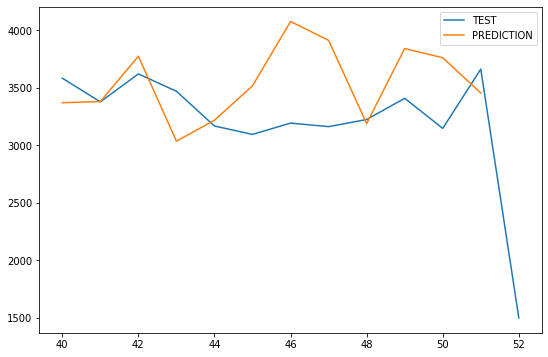

In [36]:
test['a'].plot(legend=True,label='TEST',figsize=(9,6))
test_predictions.plot(legend=True,label='PREDICTION')

###Prophet de Facebook

In [37]:
from fbprophet import Prophet

In [47]:
df3=train[['desde','a']]
df3.columns = ['ds', 'y']
df3

,ds,y
0,2019-12-30,2208.000000
1,2020-01-06,3797.333333
2,2020-01-13,3525.000000
3,2020-01-20,3482.666667
4,2020-01-27,3275.000000
5,2020-02-03,3134.500000
6,2020-02-10,3369.000000
7,2020-02-17,3917.500000
8,2020-02-24,3678.166667
9,2020-03-02,3518.833333


In [51]:
future=test[['desde']]
future.columns = ['ds']
future

,ds
40,2020-10-05
41,2020-10-12
42,2020-10-19
43,2020-10-26
44,2020-11-02
45,2020-11-09
46,2020-11-16
47,2020-11-23
48,2020-11-30
49,2020-12-07


In [52]:
# define the model
model = Prophet()
# fit the model
model.fit(df3)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds         yhat   yhat_lower   yhat_upper
0 2020-10-05  3525.183887  3123.919197  3905.075512
1 2020-10-12  3528.040337  3139.060467  3964.479784
2 2020-10-19  3530.896788  3111.145435  3917.559966
3 2020-10-26  3533.753239  3101.056465  3946.838906
4 2020-11-02  3536.609689  3126.125248  3948.074276


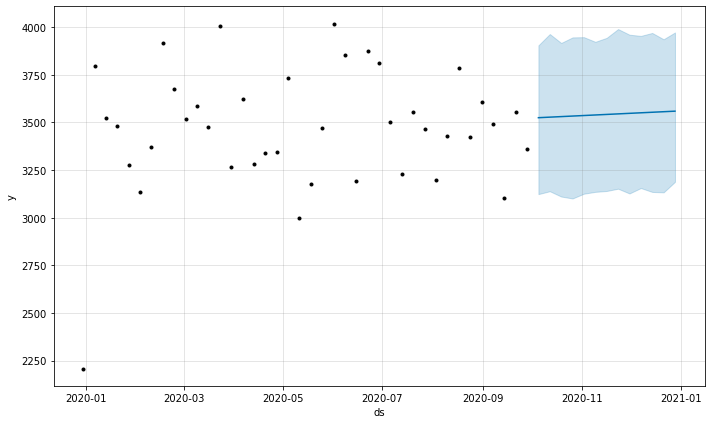

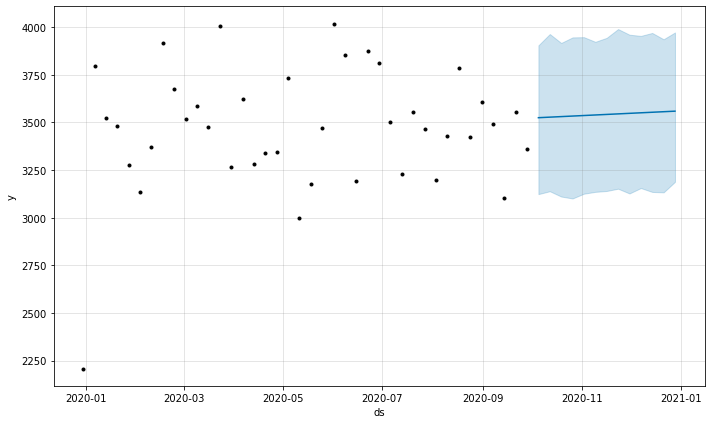

In [54]:
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)